# Photometry Data Plotting Notebook
1. import packages
2. plot average z-score traces
3. plot trial-by-trial heatmaps
4. bonus: animate your traces!

## 1. import packages

In [1]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os
import seaborn as sns
from sklearn.metrics import auc
import matplotlib.lines as mlines

In [ ]:
plt.rcParams.update({'axes.titlesize': 'large', 'axes.labelsize': 'large'})

## 2. plot average z-scored traces
- specify the folder with your processed guppy data (this should be auto-populated in the same directory as your folders for guppy)
- an individual animal's processed files will be inside the parent folder (ex: `47_1_output_1` will be inside the parent `47_1` )
- averaged data will be in the main directory in `average`
- specify the trials you want to plot in **trials**: these should be either *reward*, *iti*, or *punish*
- change trace colors using the variables assigned in **rewcolor**, **iticolor**, and **puncolor**. these are green, blue, and red by default
- change labels for each trace in the **labels** dictionary
- specify the filepath and filename you want the plot to be saved as in **plt.savefig()** (default image type is *.png* and does not need to be added to filename)

In [2]:
folder = "C:/Users/Valerie/Documents/Tejeda_Lab/headfixed/0314_gcamp/Photometry_Data/RNP/RNPD4/average"
trials = ['reward', 'iti', 'punish']
datadict = {}

for trial in trials:
    filename = folder + '/'+ trial + '_GCaMP_z_score_GCaMP.h5'
    datadict[trial] = pd.read_hdf(filename, key='df', mode='r')


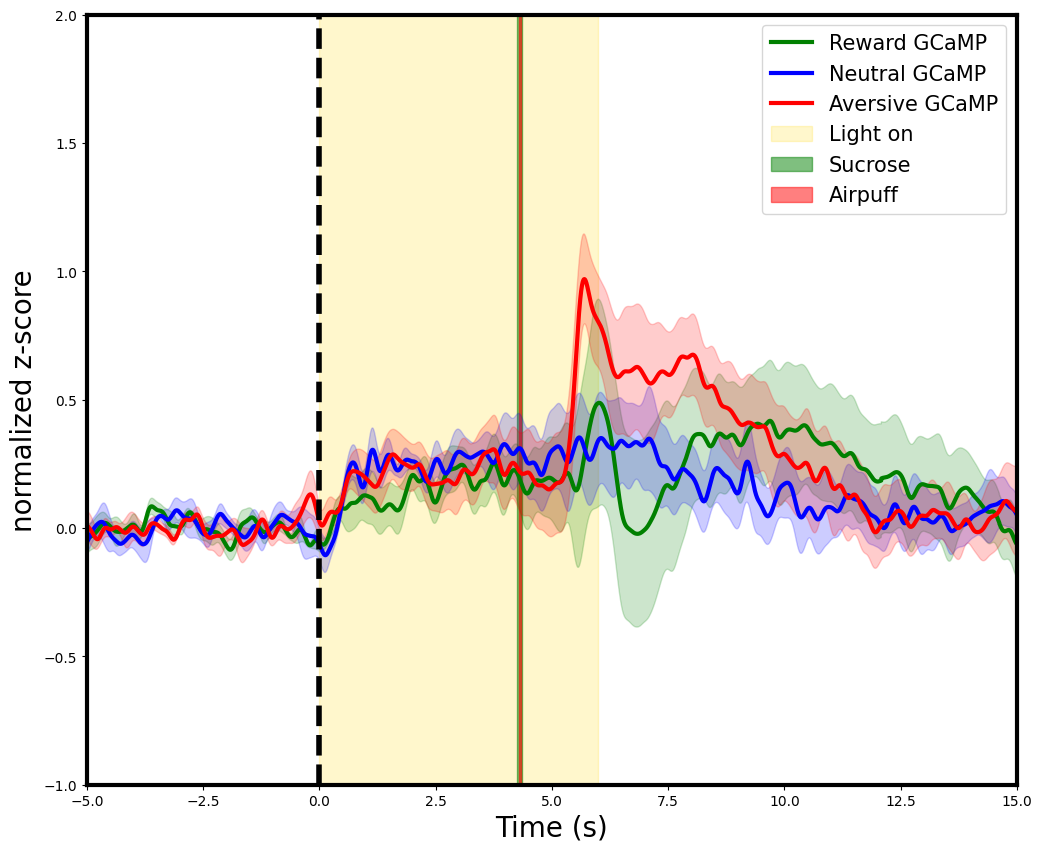

In [4]:
rewcolor = 'g'
iticolor = 'b'
puncolor = 'r'

colors = {'reward':rewcolor, 'iti':iticolor, 'punish':puncolor}
labels = {'reward': 'Reward GCaMP', 'iti':'Neutral GCaMP', 'punish':'Aversive GCaMP'}


fig,ax1 = plt.subplots(figsize=(12,10))

for spine in ax1.spines.values():
    spine.set_linewidth(3)

for trial in trials:
    ax1.plot(datadict[trial].timestamps, datadict[trial]['mean'], linewidth=3,
              label=labels[trial], color=colors[trial])
    ax1.fill_between(datadict[trial].timestamps, datadict[trial]['mean'] - datadict[trial].err, 
                     datadict[trial]['mean'] + datadict[trial].err, color=colors[trial], alpha=0.2)
    
ax1.axvline(0, linestyle='--', linewidth=4, color='black')
ax1.axvspan(0, 6, label='Light on', color='gold', alpha=0.2)
ax1.axvspan(4.25, 4.35, label='Sucrose', color='green', alpha=0.5)
ax1.axvspan(4.3, 4.33, label='Airpuff', color='red', alpha=0.5)

ax1.set_ylabel('normalized z-score', fontsize=20)
ax1.set_xlabel('Time (s)', fontsize=20)
ax1.set_ylim(-1,2)
ax1.set_xlim(-5,15)

plt.legend(fontsize=15)
plt.savefig(r"C:\Users\Valerie\Documents\Tejeda_Lab\headfixed\0314_gcamp\Photometry_Data\RNP\RNPD4_zscore")
plt.show()

## 3. plot trial-by-trial z-scored average heatmaps
- specify the directory containing folders of data processed in guppy
- this directory should be the **main** guppy analysis folder (ex: `C:\Users\Valerie\gcamp_photometry\RTD3`, which contains folders `47_1`, `48_1`,`48_2`)
- heatmap colors are scaled (blue to red) from *vmin* to *vmax* and centered around *center* (white) in **sns.heatmap()** 
- specify the filepath and filename you want the plot to be saved as in **plt.savefig()** (default image type is *.png* and does not need to be added to filename)

In [6]:
folder = r"C:\Users\Valerie\Documents\Tejeda_Lab\headfixed\gcamp_photometry\RTD3"

averages = []

for i in os.listdir(folder):
    if ('_') in i:
        filepath = (folder + '/' + i + '/' + i + '_output_1/alltrials_GCaMP_z_score_GCaMP.h5')
        df = pd.read_hdf(filepath, key='df', mode='r')
        df.set_index(df.timestamps, inplace=True)
        df = df.iloc[:,:-3]
        df.columns = np.arange(len(df.columns))
        averages.append(df)
        
averagedf = pd.concat([x for x in averages]).groupby(level=0).mean()

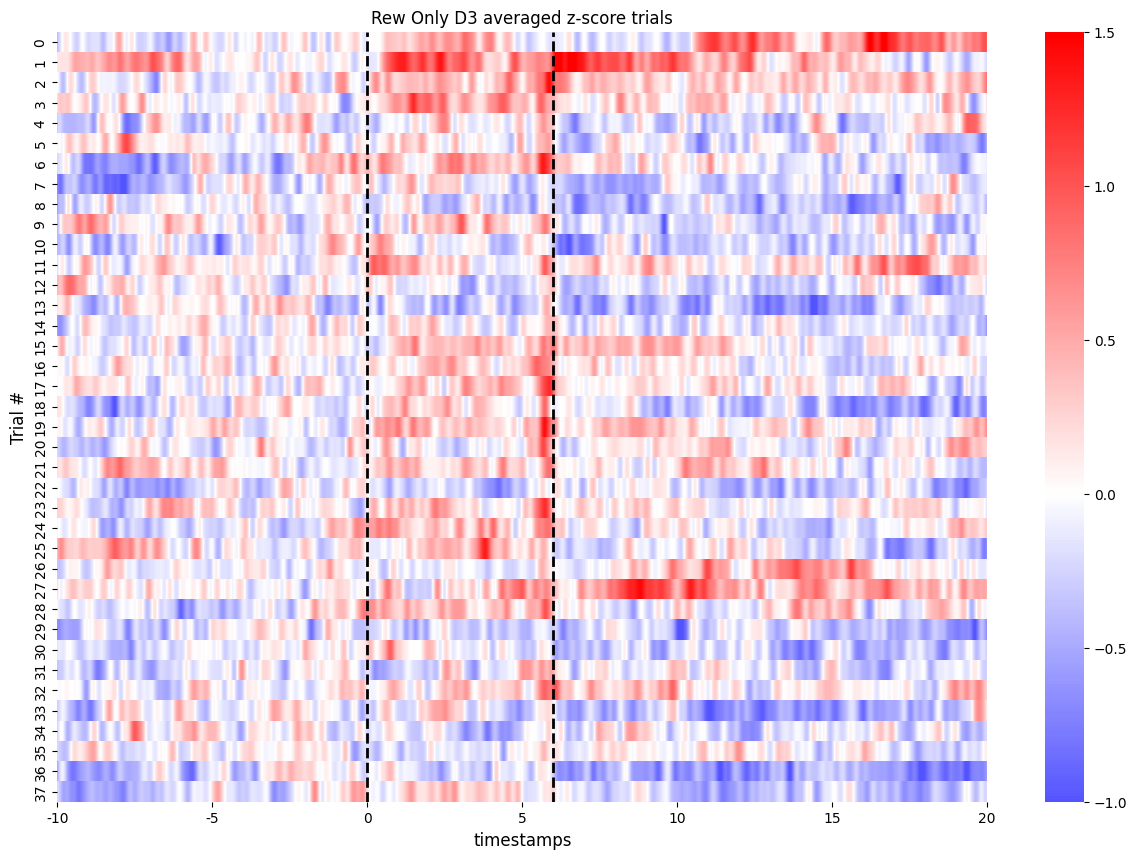

In [7]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(averagedf.T, vmin=-1, center=0, vmax=1.5, xticklabels = False, cmap="bwr")
ax.set(xticks=[0, 5086, 10172, 15259, 20346, 25432, 30518], xticklabels=[-10, -5, 0, 5, 10, 15, 20])
ax.set_ylabel('Trial #')
ax.axvline(10172, linestyle='--', linewidth=2, color='black')
ax.axvline(16276, linestyle='--', linewidth=2, color='black')
ax.set_title('Rew Only D3 averaged z-score trials')
plt.savefig(r"C:\Users\Valerie\Documents\Tejeda_Lab\headfixed\gcamp_photometry\RTD3_zscore_heatmap")
plt.show()

# bonus: animate your photometry trace!
- load a single trace from a processed **.h5** file (these can be found in the `average` or `YOUR_FOLDER_output_1` folders of guppy processed data)
- the animation currently draws a dotted line at the start of a trial (0s) and shades the full trial in yellow (6s following trial onset)
- change trace color using *color* in **ax.plot()**
- change gif fps by editing *interval* in **animation.FuncAnimation()**
- specify the filepath and filename you want the plot to be saved as in **ani.save()**

In [ ]:
filename = 'reward_GCaMP_z_score_GCaMP.h5'
df1= pd.read_hdf(filename, key='df', mode='r')

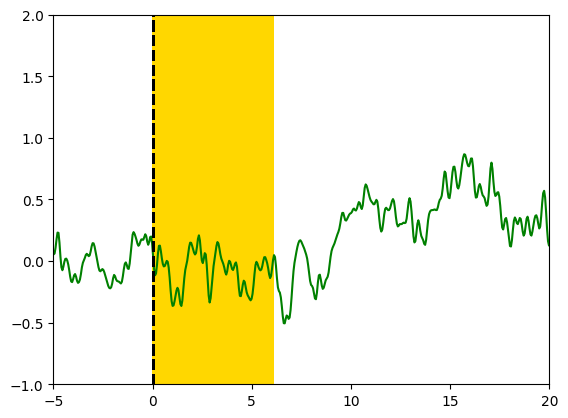

In [37]:
fig, ax = plt.subplots()

x = df1.timestamps
y = df1['mean']

# Target x-axis point for the line
target_x = 0
line_drawn = False

# Create the line plot
line, = ax.plot(x, y, color='green')

# Create the dashed line
dashed_line = mlines.Line2D([], [], color='black', linestyle='dashed', linewidth=1)
ax.add_line(dashed_line)

def update(frame_num, x, y, line, dashed_line):
    ax.set_ylim(-1, 2)
    ax.set_xlim(-5, 20)
    ax.axvline(0, linestyle='--', linewidth=2, color='black')
    ax.axvspan(0, 6, label='Light on', color='gold', alpha=0.2)
    

    # Update data for the line plot
    line.set_data(x[:frame_num + 1], y[:frame_num + 1])

    global line_drawn
    try:
        if not line_drawn and frame_num > 0 and x[frame_num] >= target_x:
            line_drawn = True
            # Update the position of the dashed line
            dashed_line.set_data([target_x, target_x], ax.get_ylim())
    except (KeyError, IndexError):
        # Handle the case where frame_num is out of range for x
        pass

    return line, dashed_line

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x[100:], y[100:], line, dashed_line],
                              interval=25, blit=True)

ani.save('annotated_rew_umass.gif')
plt.show()